In [1]:
!pip install lightgbm


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Kütüphaneler

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score , confusion_matrix , accuracy_score , roc_auc_score , roc_curve , classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler     # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

In [3]:
df = pd.read_csv("Veri ve Fotoğraflar\diabetes.csv")
df.head()


# Bağımlı değişkenimiz "Outcome". Yani burada kişi diyabet hastası mı değil mi bunu inceliyoruz. 1, hasta ; 0, hasta değil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df["Outcome"]

x = df.drop(["Outcome"] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state=42)

# MODEL

In [5]:
lgbm_model = LGBMClassifier().fit(x_train , y_train)

In [6]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\python312\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
    If setting this to a positive value, consider also changing ``num_leaves`` to ``<= 2^max_depth``.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in

# TAHMİN

In [7]:
y_pred = lgbm_model.predict(x_test)

accuracy_score(y_test , y_pred)

0.7229437229437229

# MODEL TUNING (DOĞRULAMA)

In [8]:
lgbm = LGBMClassifier()

In [9]:
lgbm_params = {"learning_rate": [0.001 , 0.01 , 0.1] , "n_estimators": [200 , 500 ,100] , "max_depth": [1,2,5,8]}

In [11]:
lgbm_cv_model = GridSearchCV(lgbm , lgbm_params , cv=10 , n_jobs=-1 , verbose=2).fit(x_train , y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [12]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [13]:
# FİNAL MODELİMİZ

lgbm_tuned = LGBMClassifier(learning_rate=0.01 , max_depth=1 , n_estimators=500).fit(x_train , y_train)

In [14]:
y_pred = lgbm_tuned.predict(x_test)

accuracy_score(y_test , y_pred)

0.7575757575757576

# DEĞİŞKEN ÖNEM DÜZEYİ

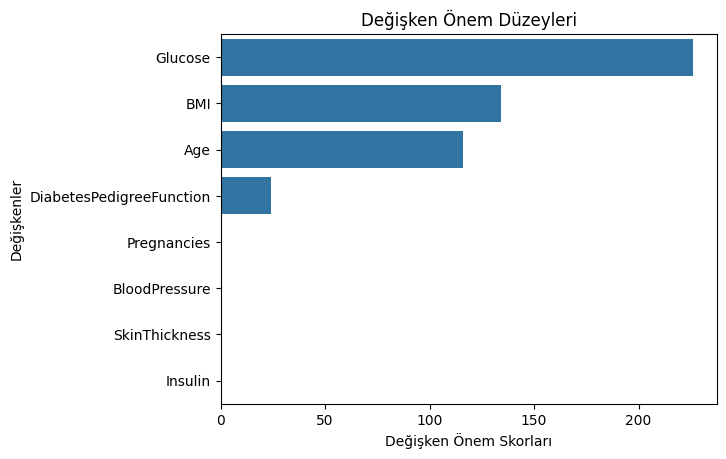

In [15]:
featue_imp = pd.Series(lgbm_tuned.feature_importances_ , index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=featue_imp , y=featue_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()